In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("/content/fraudTrain.csv")
df.shape
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [5]:
df['is_fraud']= df['category'].astype(str).str.startswith('fraud_').astype(int)
print("\nFraud Count:\n", df['is_fraud'].value_counts())


Fraud Count:
 is_fraud
0    58368
Name: count, dtype: int64


In [9]:
df = df.drop(['cc_num', 'trans_num', 'first', 'last', 'street', 'zip', 'dob',
              'unix_time', 'trans_date_trans_time'], axis=1)




In [10]:
cat_cols=['merchant','category', 'gender','city','state', 'job']
le= LabelEncoder()
for col in cat_cols:
  df[col]= le.fit_transform(df[col].astype(str))

In [11]:
x=df.drop('is_fraud', axis=1)
y=df['is_fraud']

In [13]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y,test_size=0.2,random_state=42,stratify=y)

In [16]:
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [18]:
print("Accuracy:", accuracy_score(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11674

    accuracy                           1.00     11674
   macro avg       1.00      1.00      1.00     11674
weighted avg       1.00      1.00      1.00     11674



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

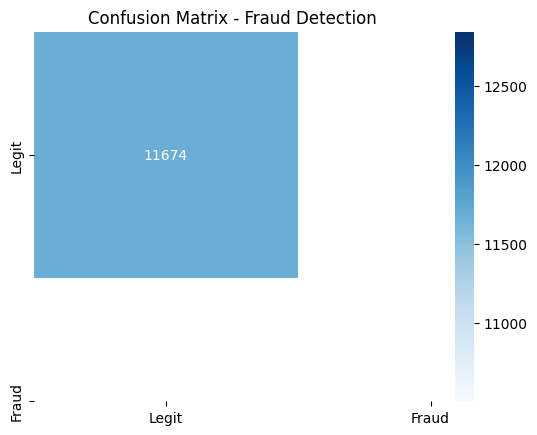

In [19]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues',xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.title("Confusion Matrix - Fraud Detection")
plt.xlable("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:
sample=x_test[0].reshape(1,-1)
pred=model.predict(sample)
print("\nsample Transaction Prediction:", "Fraud" if pred[0]== 1 else "LEGITIMATE")


sample Transaction Prediction: LEGITIMATE
